
# EVAL ML : 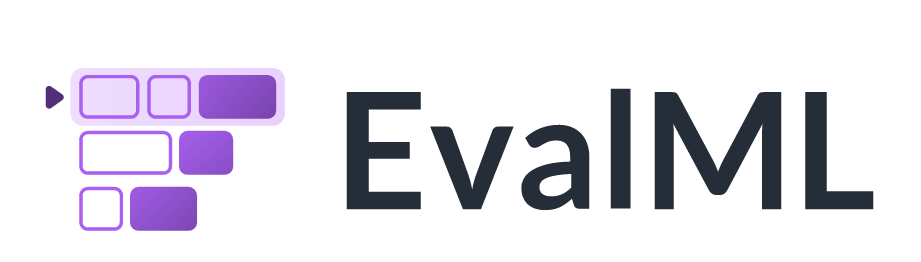
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.





## Installing Eval ML

In [127]:
!pip install evalml

  Using cached evalml-0.43.0-py3-none-any.whl (6.4 MB)
  Using cached evalml-0.42.0-py3-none-any.whl (6.4 MB)
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached numba-0.53.0-cp36-cp36m-win_amd64.whl (2.3 MB)
  Using cached evalml-0.41.0-py3-none-any.whl (6.4 MB)
  Using cached evalml-0.40.0-py3-none-any.whl (6.4 MB)
  Using cached evalml-0.39.0-py3-none-any.whl (6.4 MB)
  Using cached evalml-0.38.0-py3-none-any.whl (6.4 MB)
  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)
  Using cached evalml-0.37.0-py3-none-any.whl (6.4 MB)
  Using cached evalml-0.36.0-py3-none-any.whl (6.4 MB)
  Using cached evalml-0.35.0-py3-none-any.whl (6.3 MB)
  Using cached shap-0.40.0-cp36-cp36m-win_amd64.whl (430 kB)
  Using cached evalml-0.34.0-py3-none-any.whl (6.3 MB)
  Using cached evalml-0.33.0-py3-none-any.whl (6.3 MB)
  Using cached evalml-0.32.1-py3-none-any.whl (6.3 MB)
  Using cached evalml-0.32.0-py3-no

# Reading DataSet.

In [24]:
df= pd.read_csv("heart.csv")

In [25]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# X and y split 

In [26]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
y= df.output.copy()
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

# Train Test Split

In [31]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

# **Importing Eval ML Library**

In [28]:
import evalml

The next non-bugfix release of Featuretools will not support Python 3.6


### Need to call the AutoMLSearch

In [33]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: catboost, extra_trees, random_forest, decision_tree, lightgbm, xgboost, linear_model



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 15.699

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.689
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 4.546
	High coefficient of variation (cv >= 0.2) within cross validation scores.
	Decision Tree Classifier w/ Imputer may not perform as estimated on unseen data.
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.411
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.501
Logistic Regression Classifier w/ Imputer + Standa

## Check the result in a better way

In [34]:

automl.rankings


,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,0.409273,0.049547,0.372040,97.393029,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,0.410970,0.026978,0.392403,97.382216,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,5,Logistic Regression Classifier w/ Imputer + St...,0.438590,0.079628,0.377582,97.206285,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,4,LightGBM Classifier w/ Imputer,0.500958,0.069096,0.443723,96.809012,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,XGBoost Classifier w/ Imputer,0.517132,0.121242,0.427519,96.705989,True,{'Imputer': {'categorical_impute_strategy': 'm...
5,8,CatBoost Classifier w/ Imputer,0.642257,0.001598,0.641090,95.908973,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,1,Elastic Net Classifier w/ Imputer + Standard S...,0.689468,0.000869,0.690335,95.608247,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,2,Decision Tree Classifier w/ Imputer,4.546383,2.245911,3.944497,71.040602,True,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,15.699161,0.135405,15.777337,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


## Looking for the best pipeline 

In [35]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph=[Imputer, ExtraTreesClassifier], parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [36]:
best_pipeline=automl.best_pipeline

### Detailed Description of the Best Pipeline

In [37]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 3.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.372       0.753 0.939      0.854 0.891                     0.871            0.877                           0.476        161           81
1                      0.390       0.581 0.912

### Model Validation check

In [38]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.9004329004329004),
             ('F1', 0.8405797101449276),
             ('Precision', 0.8055555555555556),
             ('Recall', 0.8787878787878788)])

### Customizing the AutomlSearch as per our convenience 

In [39]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: catboost, extra_trees, random_forest, decision_tree, lightgbm, xgboost, linear_model



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.837
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.897
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.870
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.880
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.872
Extra Trees Classifier w/ Impute

### Ranking Chart

In [40]:
automl_auc.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,0.902260,0.042749,0.939189,40.226021,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,0.896641,0.024824,0.909091,39.664096,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,8,CatBoost Classifier w/ Imputer,0.889145,0.032924,0.919533,38.914483,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,Logistic Regression Classifier w/ Imputer + St...,0.879999,0.036021,0.906634,37.999932,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,XGBoost Classifier w/ Imputer,0.871866,0.042693,0.894963,37.186618,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,4,LightGBM Classifier w/ Imputer,0.869785,0.025928,0.875307,36.978456,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,2,Decision Tree Classifier w/ Imputer,0.836956,0.085222,0.858415,33.695627,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,0,Mode Baseline Binary Classification Pipeline,0.500000,0.000000,0.500000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}
8,1,Elastic Net Classifier w/ Imputer + Standard S...,0.500000,0.000000,0.500000,0.000000,False,{'Imputer': {'categorical_impute_strategy': 'm...


### Best Model Description

In [41]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.2 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.939 0.891      0.854        161           81
1           0.912 0.800      0.829        161           81
2           0.855 0.817      0.776        162           80
mean        0.902 0.836      0.820          -            -
std         0.043 0.049      0.040          -            -
coef of var 0.047 

In [42]:
best_pipeline_auc = automl_auc.best_pipeline


In [47]:
best_pipeline_auc.score(X_test, y_test,  objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.9004329004329004),
             ('F1', 0.8405797101449276),
             ('Precision', 0.8055555555555556),
             ('Recall', 0.8787878787878788)])